In [1]:
import numpy as np 
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print("Train:", x_train.shape, y_train.shape)
print("Test:", x_test.shape, y_test.shape)

Train: (50000, 32, 32, 3) (50000, 1)
Test: (10000, 32, 32, 3) (10000, 1)


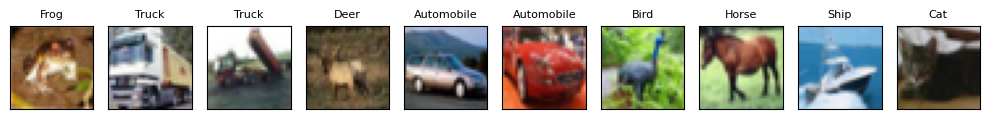

In [4]:
import matplotlib.pyplot as plt

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10,2))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]], fontsize=8)

plt.tight_layout()
plt.show()

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
from tensorflow.keras import layers, models

model = tf.keras.models.Sequential([
    layers.Conv2D(96, (5, 5), padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(80, (5, 5), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(96, (5, 5), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(64, (5, 5), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Flatten(),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    tf.keras.layers.Dense(10, activation='linear') 
])

d:\Visual Studio Documentos\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [8]:
from tensorflow.keras.callbacks import EarlyStopping



early_stop = EarlyStopping(
    monitor='accuracy',       # Métrica a observar (podes usar 'val_accuracy' também)
    patience=3,               # Nº de épocas sem melhoria antes de parar
    restore_best_weights=True  # Volta ao melhor modelo obtido
)

modelo = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 92ms/step - accuracy: 0.4184 - loss: 1.6788 - val_accuracy: 0.5637 - val_loss: 1.2774
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 89ms/step - accuracy: 0.6608 - loss: 0.9651 - val_accuracy: 0.6146 - val_loss: 1.1174
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.7286 - loss: 0.7805 - val_accuracy: 0.4897 - val_loss: 1.6901
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.7774 - loss: 0.6440 - val_accuracy: 0.6326 - val_loss: 1.1079
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.7988 - loss: 0.5730 - val_accuracy: 0.6459 - val_loss: 1.0909
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.8319 - loss: 0.4815 - val_accuracy: 0.7105 - val_loss: 0.8939
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.8583 - loss: 0.4100 - val_accuracy: 0.6915 - val_loss: 1.0226
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.8773 - loss: 0.3575 - 

KeyboardInterrupt: 

In [10]:
from PIL import Image

def carregar_e_preparar_imagem(caminho):
    img = Image.open(caminho).resize((32, 32)).convert('RGB')
    img_array = np.array(img) / 255.0  # Normalizar
    img_array = np.expand_dims(img_array, axis=0)  # (1, 32, 32, 3)
    return img_array

In [20]:
imagem = carregar_e_preparar_imagem("Imagens_test\CAT.jpg")
predicao = model.predict(imagem)

classe = np.argmax(predicao)
confiança = np.max(tf.nn.softmax(predicao))
predicoes_softmax = tf.nn.softmax(predicao[0]).numpy()


class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

print(f"Classe prevista: {class_names[classe]} ({confiança*100:.2f}% de confiança)")
for i, prob in enumerate(predicoes_softmax):
    print(f"{class_names[i]}: {prob*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Classe prevista: Cat (61.48% de confiança)
Airplane: 0.00%
Automobile: 0.00%
Bird: 0.00%
Cat: 61.48%
Deer: 0.00%
Dog: 38.48%
Frog: 0.00%
Horse: 0.03%
Ship: 0.00%
Truck: 0.00%


In [9]:
model.save("modelo_cifar10.h5")